<a href="https://colab.research.google.com/github/Shankarram2709/Clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silhouette Score for K-Means: 0.4044116841135985


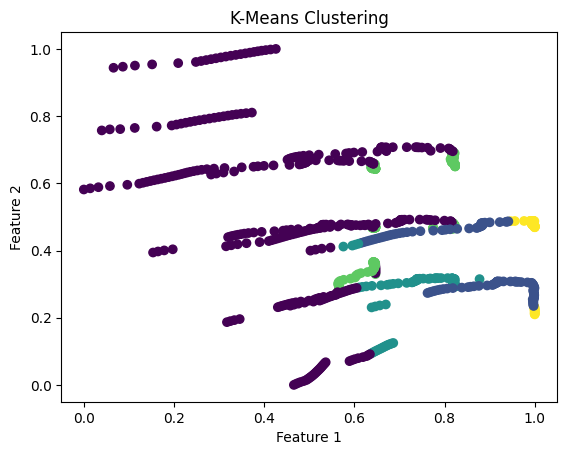

In [8]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
torch.manual_seed(42)

# Load the dataset
df = pd.read_csv(r"/content/data.csv")

# Feature Engineering
df['distance_to_left_lane'] = df['lat_dist'] - df['lane_left_boundary']
df['distance_to_right_lane'] = df['lane_right_boundary'] - df['lat_dist']

# Selecting Features for Clustering
selected_features = df[['lat_dist', 'long_dist', 'abs_vel', 'lane_association', 'is_cipv', 'distance_to_left_lane', 'distance_to_right_lane']]
# Standardize Features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(selected_features)

# Convert to PyTorch Tensor
features_tensor = torch.tensor(normalized_features, dtype=torch.float)

# K-Means Clustering in PyTorch
def kmeans(features, k, max_iters=100):
    centroids = features[:k, :].clone()

    for _ in range(max_iters):
        # Calculate distances to centroids
        distances = torch.cdist(features, centroids)

        # Assign each point to the closest centroid
        labels = torch.argmin(distances, dim=1)

        # Update centroids based on mean of points in each cluster
        for i in range(k):
            centroids[i] = features[labels == i].mean(dim=0)

    return labels.numpy()

# Specify the number of clusters (k)
num_clusters = 5

# Apply k-means clustering
kmeans_labels = kmeans(features_tensor, num_clusters)
df['kmeans_cluster_labels'] = pd.Series(kmeans_labels)
# Calculate Silhouette Score
silhouette_kmeans = silhouette_score(normalized_features, kmeans_labels)
print("Silhouette Score for K-Means:", silhouette_kmeans)

# Visualize Clustering Results
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


<ipython-input-11-b08d3811b6af>:4: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(


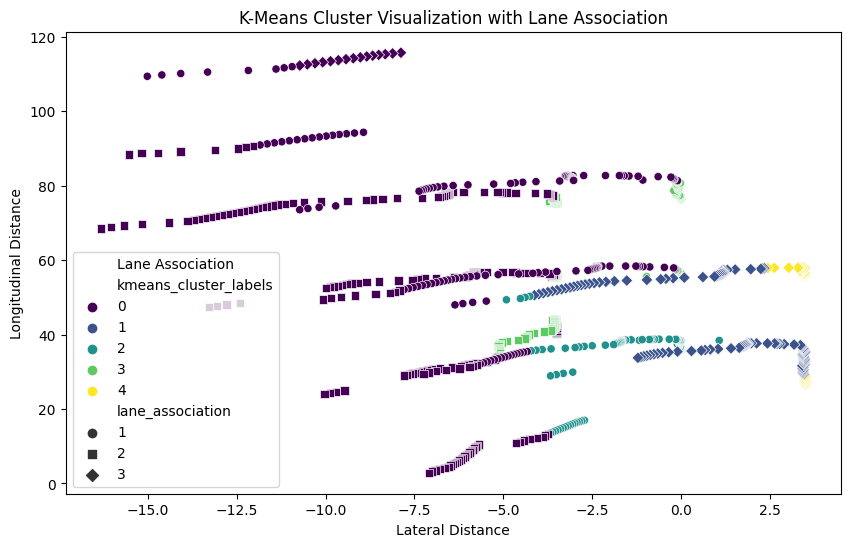

In [11]:
import seaborn as sns
# Scatter plot with 'longitudinal_distance', 'lateral_distance', and 'lane_association'
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='lat_dist',
    y='long_dist',
    hue='kmeans_cluster_labels',
    style='lane_association',
    data=df,
    palette='viridis',
    markers=["o", "s", "D", "^", "P"]  # Use different markers for each lane association
)
plt.xlabel('Lateral Distance')
plt.ylabel('Longitudinal Distance')
plt.title('K-Means Cluster Visualization with Lane Association')
plt.legend(title='Lane Association')
plt.show()


<ipython-input-10-ff6be4950576>:8: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(


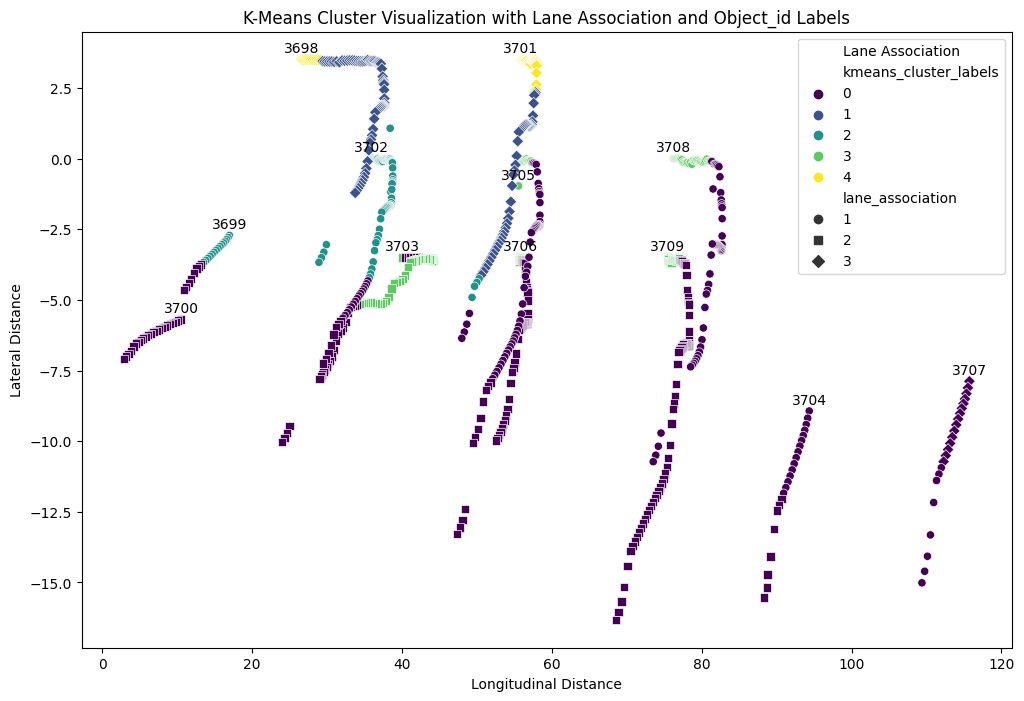

In [10]:
import seaborn as sns

# Select a subset of object_id for labeling (adjust as needed)
label_object_ids = df['object_id'].unique()

# Scatter plot with 'longitudinal_distance', 'lateral_distance', 'lane_association', and labeled object_id
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='long_dist',
    y='lat_dist',
    hue='kmeans_cluster_labels',
    style='lane_association',
    markers=["o", "s", "D", "^", "P"],
    data=df,
    palette='viridis'
)

# Annotate object_id for selected points
for label_object_id in label_object_ids:
    label_point = df[df['object_id'] == label_object_id].iloc[0]
    plt.annotate(
        label_object_id,
        (label_point['long_dist'], label_point['lat_dist']),
        textcoords="offset points",
        xytext=(0, 5),
        ha='center'
    )

plt.xlabel('Longitudinal Distance')
plt.ylabel('Lateral Distance')
plt.title('K-Means Cluster Visualization with Lane Association and Object_id Labels')
plt.legend(title='Lane Association')
plt.show()
